In [206]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [207]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
Data_train = main_path+open_folder[6]
Data_test = main_path+open_folder[5]

In [208]:
# train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
# display(train_csv)
# df = train_csv['goalAwayTeam_FullTime']
# df.unique()
# X = train_csv.drop(['id_match','idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
# X = X[:,1:]
# Y = train_csv['score'].values
# X[0]
# x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
# print(x_train.shape,y_train.shape)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

In [209]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,267926,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,267922,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,267919,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,267923,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,267924,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1577,278367,2019-07-31,611,1873,Qarabağ Ağdam FK,Dundalk FC,1.0,1,0,3,0,0,0,0,0,1054,195
1236,1578,269514,2019-07-31,1876,1904,FC København,The New Saints FC,1.0,0,0,1,0,1,0,0,1,100,100
1237,1579,279609,2019-08-06,752,611,APOEL FC,Qarabağ Ağdam FK,2.0,0,0,1,2,2,1,0,0,3270,1054
1238,1580,278630,2019-08-06,6146,678,PAOK FC,AFC Ajax,0.0,2,1,2,2,-1,-1,-1,-1,3673,8164


In [210]:
df = train_csv['goalAwayTeam_FullTime']
df.unique()

array([3, 2, 1, 0, 4, 5, 9, 6, 7], dtype=int64)

In [211]:
X = train_csv.drop(['id_match','idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
X

array([[  -1,   -1,   -1,   -1, 2409, 6154],
       [  -1,   -1,   -1,   -1, 4008, 3054],
       [  -1,   -1,   -1,   -1, 3029,  100],
       ...,
       [   2,    1,    0,    0, 3270, 1054],
       [  -1,   -1,   -1,   -1, 3673, 8164],
       [   2,    0,    0,    0, 2478, 1735]], dtype=int64)

In [212]:
Y = train_csv['score'].values
Y[0]

2.0

In [213]:
x_train, x_validation, y_train, y_validation =train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)
y_train = y_train.astype(int)
y_validation = y_validation.astype(int)

(992, 6) (992,)


In [214]:
# for row in y_train:
#      print(row)

In [215]:
x_train

array([[    0,     0,     0,     0,  2817,  7938],
       [    0,     1,     3,     0,  2475,  3663],
       [    0,     0,     0,     1,  3982,  2817],
       ...,
       [    0,     0,     0,     0, 13105,  3663],
       [    0,     1,     0,     0,  2866,   100],
       [    0,     0,     1,     0,  7928,  2679]], dtype=int64)

In [216]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [217]:
model = create_model()
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_98 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_99 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_100 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_101 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_102 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_103 (Dense)            (None, 512)             

In [218]:
save = ModelCheckpoint('model_CNN.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [219]:
history = model.fit(x_train, y_train,validation_data=(x_validation,y_validation),batch_size=90,epochs=1000,callbacks = [save])

Train on 992 samples, validate on 248 samples
Epoch 1/1000
810/992 [=======================>......] - ETA: 0s - loss: 196.2592 - accuracy: 0.3741    
Epoch 00001: val_accuracy improved from -inf to 0.44758, saving model to model_CNN.h5
992/992 [==============================] - 1s 738us/sample - loss: 168.3882 - accuracy: 0.3931 - val_loss: 46.7949 - val_accuracy: 0.4476
Epoch 2/1000
810/992 [=======================>......] - ETA: 0s - loss: 44.3747 - accuracy: 0.4284
Epoch 00002: val_accuracy did not improve from 0.44758
992/992 [==============================] - 0s 91us/sample - loss: 40.4245 - accuracy: 0.4254 - val_loss: 18.1076 - val_accuracy: 0.2944
Epoch 3/1000
810/992 [=======================>......] - ETA: 0s - loss: 23.0973 - accuracy: 0.4099
Epoch 00003: val_accuracy improved from 0.44758 to 0.49194, saving model to model_CNN.h5
992/992 [==============================] - 0s 118us/sample - loss: 21.0525 - accuracy: 0.4113 - val_loss: 11.8540 - val_accuracy: 0.4919
Epoch 4/100

Epoch 29/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.3803 - accuracy: 0.4444
Epoch 00029: val_accuracy did not improve from 0.49194
992/992 [==============================] - 0s 128us/sample - loss: 1.3042 - accuracy: 0.4486 - val_loss: 1.3685 - val_accuracy: 0.4153
Epoch 30/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.1988 - accuracy: 0.4654
Epoch 00030: val_accuracy did not improve from 0.49194
992/992 [==============================] - 0s 90us/sample - loss: 1.1967 - accuracy: 0.4637 - val_loss: 1.4240 - val_accuracy: 0.3468
Epoch 31/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.2041 - accuracy: 0.4433
Epoch 00031: val_accuracy did not improve from 0.49194
992/992 [==============================] - 0s 84us/sample - loss: 1.2015 - accuracy: 0.4395 - val_loss: 1.2105 - val_accuracy: 0.4516
Epoch 32/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.1983 - accuracy: 0.4622
Epoch 00032: val_accuracy improved f

810/992 [=======================>......] - ETA: 0s - loss: 1.3538 - accuracy: 0.4531
Epoch 00057: val_accuracy did not improve from 0.51613
992/992 [==============================] - 0s 100us/sample - loss: 1.3430 - accuracy: 0.4516 - val_loss: 1.3006 - val_accuracy: 0.4355
Epoch 58/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.1375 - accuracy: 0.4790
Epoch 00058: val_accuracy did not improve from 0.51613
992/992 [==============================] - 0s 100us/sample - loss: 1.1161 - accuracy: 0.4819 - val_loss: 1.4235 - val_accuracy: 0.3145
Epoch 59/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.2343 - accuracy: 0.4160
Epoch 00059: val_accuracy did not improve from 0.51613
992/992 [==============================] - 0s 94us/sample - loss: 1.2001 - accuracy: 0.4224 - val_loss: 1.0925 - val_accuracy: 0.4637
Epoch 60/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.1733 - accuracy: 0.4589
Epoch 00060: val_accuracy did not improve from 0.

Epoch 00085: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 85us/sample - loss: 1.0180 - accuracy: 0.5141 - val_loss: 1.0431 - val_accuracy: 0.4355
Epoch 86/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0395 - accuracy: 0.4889
Epoch 00086: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 84us/sample - loss: 1.0354 - accuracy: 0.4929 - val_loss: 1.0209 - val_accuracy: 0.5081
Epoch 87/1000
720/992 [====================>.........] - ETA: 0s - loss: 0.9866 - accuracy: 0.5111
Epoch 00087: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 125us/sample - loss: 1.0001 - accuracy: 0.5060 - val_loss: 1.0409 - val_accuracy: 0.4274
Epoch 88/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0556 - accuracy: 0.4178
Epoch 00088: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 86us/sample - loss: 1.0490 - accur

Epoch 114/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0262 - accuracy: 0.4989
Epoch 00114: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 83us/sample - loss: 1.0214 - accuracy: 0.4950 - val_loss: 1.0398 - val_accuracy: 0.4032
Epoch 115/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0460 - accuracy: 0.4544
Epoch 00115: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 89us/sample - loss: 1.0414 - accuracy: 0.4617 - val_loss: 1.0231 - val_accuracy: 0.4839
Epoch 116/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9969 - accuracy: 0.5278
Epoch 00116: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 86us/sample - loss: 1.0049 - accuracy: 0.5181 - val_loss: 1.0068 - val_accuracy: 0.4960
Epoch 117/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0326 - accuracy: 0.4578
Epoch 00117: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 1.0229 - accuracy: 0.4944
Epoch 00142: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 91us/sample - loss: 1.0225 - accuracy: 0.4929 - val_loss: 1.0192 - val_accuracy: 0.4758
Epoch 143/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9912 - accuracy: 0.5089
Epoch 00143: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 84us/sample - loss: 0.9943 - accuracy: 0.5050 - val_loss: 1.0014 - val_accuracy: 0.5282
Epoch 144/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0200 - accuracy: 0.5111
Epoch 00144: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 89us/sample - loss: 1.0195 - accuracy: 0.5020 - val_loss: 1.0672 - val_accuracy: 0.4113
Epoch 145/1000
630/992 [==================>...........] - ETA: 0s - loss: 1.0292 - accuracy: 0.4921
Epoch 00145: val_accuracy did not improve from 0

Epoch 171/1000
810/992 [=======================>......] - ETA: 0s - loss: 0.9904 - accuracy: 0.5148
Epoch 00171: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 88us/sample - loss: 0.9915 - accuracy: 0.5111 - val_loss: 0.9886 - val_accuracy: 0.5282
Epoch 172/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9875 - accuracy: 0.5200
Epoch 00172: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 88us/sample - loss: 0.9910 - accuracy: 0.5121 - val_loss: 0.9889 - val_accuracy: 0.5000
Epoch 173/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9848 - accuracy: 0.5278
Epoch 00173: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 82us/sample - loss: 0.9897 - accuracy: 0.5222 - val_loss: 0.9877 - val_accuracy: 0.5323
Epoch 174/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9865 - accuracy: 0.5100
Epoch 00174: val_accuracy did not

810/992 [=======================>......] - ETA: 0s - loss: 1.0461 - accuracy: 0.4840
Epoch 00199: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 91us/sample - loss: 1.0496 - accuracy: 0.4829 - val_loss: 1.2267 - val_accuracy: 0.3790
Epoch 200/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0885 - accuracy: 0.4322
Epoch 00200: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 84us/sample - loss: 1.0791 - accuracy: 0.4375 - val_loss: 1.0722 - val_accuracy: 0.4113
Epoch 201/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0968 - accuracy: 0.4311
Epoch 00201: val_accuracy did not improve from 0.53226
992/992 [==============================] - 0s 85us/sample - loss: 1.0902 - accuracy: 0.4425 - val_loss: 1.0109 - val_accuracy: 0.5121
Epoch 202/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0062 - accuracy: 0.5167
Epoch 00202: val_accuracy did not improve from 0

900/992 [==========================>...] - ETA: 0s - loss: 0.9932 - accuracy: 0.5100
Epoch 00227: val_accuracy did not improve from 0.53629
992/992 [==============================] - 0s 87us/sample - loss: 1.0004 - accuracy: 0.5000 - val_loss: 1.0032 - val_accuracy: 0.5040
Epoch 228/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9894 - accuracy: 0.5189
Epoch 00228: val_accuracy did not improve from 0.53629
992/992 [==============================] - 0s 84us/sample - loss: 0.9970 - accuracy: 0.5131 - val_loss: 1.0126 - val_accuracy: 0.5081
Epoch 229/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0178 - accuracy: 0.5062
Epoch 00229: val_accuracy improved from 0.53629 to 0.54032, saving model to model_CNN.h5
992/992 [==============================] - 0s 126us/sample - loss: 1.0116 - accuracy: 0.5091 - val_loss: 1.0011 - val_accuracy: 0.5403
Epoch 230/1000
990/992 [============================>.] - ETA: 0s - loss: 0.9995 - accuracy: 0.5242
Epoch 00230: 

900/992 [==========================>...] - ETA: 0s - loss: 0.9789 - accuracy: 0.5289
Epoch 00255: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 95us/sample - loss: 0.9847 - accuracy: 0.5222 - val_loss: 1.0013 - val_accuracy: 0.5121
Epoch 256/1000
720/992 [====================>.........] - ETA: 0s - loss: 0.9765 - accuracy: 0.5236
Epoch 00256: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 100us/sample - loss: 0.9803 - accuracy: 0.5222 - val_loss: 1.0001 - val_accuracy: 0.5040
Epoch 257/1000
720/992 [====================>.........] - ETA: 0s - loss: 0.9795 - accuracy: 0.5292
Epoch 00257: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 110us/sample - loss: 0.9889 - accuracy: 0.5171 - val_loss: 1.0023 - val_accuracy: 0.5000
Epoch 258/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9791 - accuracy: 0.5167
Epoch 00258: val_accuracy did not improve from

Epoch 00283: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 87us/sample - loss: 0.9935 - accuracy: 0.5232 - val_loss: 1.0079 - val_accuracy: 0.5121
Epoch 284/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9826 - accuracy: 0.5311
Epoch 00284: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 0.9842 - accuracy: 0.5272 - val_loss: 0.9963 - val_accuracy: 0.4919
Epoch 285/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9931 - accuracy: 0.5089
Epoch 00285: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 81us/sample - loss: 0.9900 - accuracy: 0.5151 - val_loss: 0.9915 - val_accuracy: 0.5121
Epoch 286/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9972 - accuracy: 0.5333
Epoch 00286: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0020 - acc

Epoch 312/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0165 - accuracy: 0.5078
Epoch 00312: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0156 - accuracy: 0.5111 - val_loss: 1.0679 - val_accuracy: 0.5081
Epoch 313/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.1188 - accuracy: 0.4722
Epoch 00313: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.1107 - accuracy: 0.4778 - val_loss: 1.0048 - val_accuracy: 0.5040
Epoch 314/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0359 - accuracy: 0.5022
Epoch 00314: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0434 - accuracy: 0.4849 - val_loss: 1.0509 - val_accuracy: 0.4315
Epoch 315/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0457 - accuracy: 0.4922
Epoch 00315: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 4.4414 - accuracy: 0.3844
Epoch 00340: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 4.1582 - accuracy: 0.3780 - val_loss: 6.0814 - val_accuracy: 0.4073
Epoch 341/1000
900/992 [==========================>...] - ETA: 0s - loss: 4.9122 - accuracy: 0.3867
Epoch 00341: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 4.6171 - accuracy: 0.3931 - val_loss: 6.1295 - val_accuracy: 0.4073
Epoch 342/1000
900/992 [==========================>...] - ETA: 0s - loss: 3.7466 - accuracy: 0.3967
Epoch 00342: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 91us/sample - loss: 4.0514 - accuracy: 0.4002 - val_loss: 3.2403 - val_accuracy: 0.4073
Epoch 343/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.6958 - accuracy: 0.3847
Epoch 00343: val_accuracy did not improve from 0

Epoch 00368: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 107us/sample - loss: 1.0026 - accuracy: 0.5050 - val_loss: 1.0071 - val_accuracy: 0.5323
Epoch 369/1000
630/992 [==================>...........] - ETA: 0s - loss: 1.0264 - accuracy: 0.4841
Epoch 00369: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 114us/sample - loss: 1.0133 - accuracy: 0.5181 - val_loss: 1.0090 - val_accuracy: 0.5242
Epoch 370/1000
990/992 [============================>.] - ETA: 0s - loss: 0.9954 - accuracy: 0.5192
Epoch 00370: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 78us/sample - loss: 0.9946 - accuracy: 0.5202 - val_loss: 1.0091 - val_accuracy: 0.5242
Epoch 371/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0251 - accuracy: 0.5067
Epoch 00371: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0250 - a

Epoch 00396: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 93us/sample - loss: 1.0159 - accuracy: 0.4647 - val_loss: 1.0156 - val_accuracy: 0.5081
Epoch 397/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0083 - accuracy: 0.5156
Epoch 00397: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0040 - accuracy: 0.5171 - val_loss: 1.0206 - val_accuracy: 0.5121
Epoch 398/1000
900/992 [==========================>...] - ETA: 0s - loss: 0.9900 - accuracy: 0.5244
Epoch 00398: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 0.9949 - accuracy: 0.5171 - val_loss: 1.0182 - val_accuracy: 0.5121
Epoch 399/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0019 - accuracy: 0.4989
Epoch 00399: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0031 - acc

Epoch 425/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0626 - accuracy: 0.4633
Epoch 00425: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 88us/sample - loss: 1.0600 - accuracy: 0.4647 - val_loss: 1.0881 - val_accuracy: 0.4073
Epoch 426/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0584 - accuracy: 0.4642
Epoch 00426: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 90us/sample - loss: 1.0597 - accuracy: 0.4647 - val_loss: 1.0872 - val_accuracy: 0.4073
Epoch 427/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0611 - accuracy: 0.4667
Epoch 00427: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0603 - accuracy: 0.4647 - val_loss: 1.0915 - val_accuracy: 0.4073
Epoch 428/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0620 - accuracy: 0.4656
Epoch 00428: val_accuracy did not

810/992 [=======================>......] - ETA: 0s - loss: 1.0653 - accuracy: 0.4568
Epoch 00453: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 102us/sample - loss: 1.0610 - accuracy: 0.4647 - val_loss: 1.0965 - val_accuracy: 0.4073
Epoch 454/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0526 - accuracy: 0.4736
Epoch 00454: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 104us/sample - loss: 1.0610 - accuracy: 0.4647 - val_loss: 1.1000 - val_accuracy: 0.4073
Epoch 455/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0600 - accuracy: 0.4667
Epoch 00455: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 81us/sample - loss: 1.0611 - accuracy: 0.4647 - val_loss: 1.0974 - val_accuracy: 0.4073
Epoch 456/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0649 - accuracy: 0.4600
Epoch 00456: val_accuracy did not improve from

Epoch 00481: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 91us/sample - loss: 1.0643 - accuracy: 0.4647 - val_loss: 1.1047 - val_accuracy: 0.4073
Epoch 482/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0601 - accuracy: 0.4678
Epoch 00482: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 87us/sample - loss: 1.0612 - accuracy: 0.4647 - val_loss: 1.0991 - val_accuracy: 0.4073
Epoch 483/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0617 - accuracy: 0.4633
Epoch 00483: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0612 - accuracy: 0.4647 - val_loss: 1.0922 - val_accuracy: 0.4073
Epoch 484/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0588 - accuracy: 0.4722
Epoch 00484: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0621 - acc

Epoch 510/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0664 - accuracy: 0.4556
Epoch 00510: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0608 - accuracy: 0.4647 - val_loss: 1.1005 - val_accuracy: 0.4073
Epoch 511/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0614 - accuracy: 0.4657
Epoch 00511: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 82us/sample - loss: 1.0620 - accuracy: 0.4647 - val_loss: 1.1047 - val_accuracy: 0.4073
Epoch 512/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0606 - accuracy: 0.4636
Epoch 00512: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 80us/sample - loss: 1.0600 - accuracy: 0.4647 - val_loss: 1.0948 - val_accuracy: 0.4073
Epoch 513/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0585 - accuracy: 0.4689
Epoch 00513: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 1.0575 - accuracy: 0.4711
Epoch 00538: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 94us/sample - loss: 1.0610 - accuracy: 0.4647 - val_loss: 1.0920 - val_accuracy: 0.4073
Epoch 539/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0632 - accuracy: 0.4625
Epoch 00539: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 102us/sample - loss: 1.0621 - accuracy: 0.4647 - val_loss: 1.0934 - val_accuracy: 0.4073
Epoch 540/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0639 - accuracy: 0.4600
Epoch 00540: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 92us/sample - loss: 1.0616 - accuracy: 0.4647 - val_loss: 1.0903 - val_accuracy: 0.4073
Epoch 541/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0615 - accuracy: 0.4654
Epoch 00541: val_accuracy did not improve from 

Epoch 00566: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 92us/sample - loss: 1.0619 - accuracy: 0.4647 - val_loss: 1.1017 - val_accuracy: 0.4073
Epoch 567/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0618 - accuracy: 0.4667
Epoch 00567: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0619 - accuracy: 0.4647 - val_loss: 1.0946 - val_accuracy: 0.4073
Epoch 568/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0600 - accuracy: 0.4667
Epoch 00568: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0608 - accuracy: 0.4647 - val_loss: 1.0903 - val_accuracy: 0.4073
Epoch 569/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0604 - accuracy: 0.4667
Epoch 00569: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0613 - acc

Epoch 595/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0609 - accuracy: 0.4667
Epoch 00595: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 88us/sample - loss: 1.0629 - accuracy: 0.4647 - val_loss: 1.1038 - val_accuracy: 0.4073
Epoch 596/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0591 - accuracy: 0.4689
Epoch 00596: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0609 - accuracy: 0.4647 - val_loss: 1.0976 - val_accuracy: 0.4073
Epoch 597/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0623 - accuracy: 0.4633
Epoch 00597: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 89us/sample - loss: 1.0604 - accuracy: 0.4647 - val_loss: 1.1005 - val_accuracy: 0.4073
Epoch 598/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0628 - accuracy: 0.4611
Epoch 00598: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 1.0635 - accuracy: 0.4611
Epoch 00623: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0620 - accuracy: 0.4647 - val_loss: 1.0914 - val_accuracy: 0.4073
Epoch 624/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0626 - accuracy: 0.4622
Epoch 00624: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0609 - accuracy: 0.4647 - val_loss: 1.0963 - val_accuracy: 0.4073
Epoch 625/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0648 - accuracy: 0.4593
Epoch 00625: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 94us/sample - loss: 1.0636 - accuracy: 0.4647 - val_loss: 1.0991 - val_accuracy: 0.4073
Epoch 626/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0702 - accuracy: 0.4569
Epoch 00626: val_accuracy did not improve from 0

Epoch 00651: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 101us/sample - loss: 1.0611 - accuracy: 0.4647 - val_loss: 1.0918 - val_accuracy: 0.4073
Epoch 652/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0632 - accuracy: 0.4611
Epoch 00652: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 111us/sample - loss: 1.0633 - accuracy: 0.4647 - val_loss: 1.0890 - val_accuracy: 0.4073
Epoch 653/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0643 - accuracy: 0.4611
Epoch 00653: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 87us/sample - loss: 1.0624 - accuracy: 0.4647 - val_loss: 1.0898 - val_accuracy: 0.4073
Epoch 654/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0645 - accuracy: 0.4633
Epoch 00654: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0640 - a

Epoch 680/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0620 - accuracy: 0.4642
Epoch 00680: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 92us/sample - loss: 1.0618 - accuracy: 0.4647 - val_loss: 1.0915 - val_accuracy: 0.4073
Epoch 681/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0621 - accuracy: 0.4633
Epoch 00681: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 87us/sample - loss: 1.0611 - accuracy: 0.4647 - val_loss: 1.0925 - val_accuracy: 0.4073
Epoch 682/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0644 - accuracy: 0.4569
Epoch 00682: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 103us/sample - loss: 1.0601 - accuracy: 0.4647 - val_loss: 1.0951 - val_accuracy: 0.4073
Epoch 683/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0611 - accuracy: 0.4654
Epoch 00683: val_accuracy did no

900/992 [==========================>...] - ETA: 0s - loss: 1.0616 - accuracy: 0.4656
Epoch 00708: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 90us/sample - loss: 1.0623 - accuracy: 0.4647 - val_loss: 1.0896 - val_accuracy: 0.4073
Epoch 709/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0663 - accuracy: 0.4519
Epoch 00709: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 95us/sample - loss: 1.0606 - accuracy: 0.4647 - val_loss: 1.0949 - val_accuracy: 0.4073
Epoch 710/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0548 - accuracy: 0.4736
Epoch 00710: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 113us/sample - loss: 1.0600 - accuracy: 0.4647 - val_loss: 1.0935 - val_accuracy: 0.4073
Epoch 711/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0604 - accuracy: 0.4678
Epoch 00711: val_accuracy did not improve from 

Epoch 737/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0615 - accuracy: 0.4636
Epoch 00737: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 80us/sample - loss: 1.0609 - accuracy: 0.4647 - val_loss: 1.0963 - val_accuracy: 0.4073
Epoch 738/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0633 - accuracy: 0.4622
Epoch 00738: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0612 - accuracy: 0.4647 - val_loss: 1.1016 - val_accuracy: 0.4073
Epoch 739/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0561 - accuracy: 0.4681
Epoch 00739: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 97us/sample - loss: 1.0599 - accuracy: 0.4647 - val_loss: 1.0956 - val_accuracy: 0.4073
Epoch 740/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0570 - accuracy: 0.4728
Epoch 00740: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 1.0629 - accuracy: 0.4589
Epoch 00765: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 88us/sample - loss: 1.0606 - accuracy: 0.4647 - val_loss: 1.0923 - val_accuracy: 0.4073
Epoch 766/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0548 - accuracy: 0.4722
Epoch 00766: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0603 - accuracy: 0.4647 - val_loss: 1.0979 - val_accuracy: 0.4073
Epoch 767/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0639 - accuracy: 0.4589
Epoch 00767: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0608 - accuracy: 0.4647 - val_loss: 1.0967 - val_accuracy: 0.4073
Epoch 768/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0576 - accuracy: 0.4700
Epoch 00768: val_accuracy did not improve from 0

Epoch 794/1000
630/992 [==================>...........] - ETA: 0s - loss: 1.0600 - accuracy: 0.4683
Epoch 00794: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 111us/sample - loss: 1.0615 - accuracy: 0.4647 - val_loss: 1.0916 - val_accuracy: 0.4073
Epoch 795/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0622 - accuracy: 0.4646
Epoch 00795: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 81us/sample - loss: 1.0623 - accuracy: 0.4647 - val_loss: 1.0946 - val_accuracy: 0.4073
Epoch 796/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0631 - accuracy: 0.4611
Epoch 00796: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 108us/sample - loss: 1.0615 - accuracy: 0.4647 - val_loss: 1.0940 - val_accuracy: 0.4073
Epoch 797/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0652 - accuracy: 0.4568
Epoch 00797: val_accuracy did n

900/992 [==========================>...] - ETA: 0s - loss: 1.0526 - accuracy: 0.4756
Epoch 00822: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0615 - accuracy: 0.4647 - val_loss: 1.1037 - val_accuracy: 0.4073
Epoch 823/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0650 - accuracy: 0.4622
Epoch 00823: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 86us/sample - loss: 1.0631 - accuracy: 0.4647 - val_loss: 1.1056 - val_accuracy: 0.4073
Epoch 824/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0607 - accuracy: 0.4678
Epoch 00824: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0623 - accuracy: 0.4647 - val_loss: 1.1009 - val_accuracy: 0.4073
Epoch 825/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0639 - accuracy: 0.4611
Epoch 00825: val_accuracy did not improve from 0

Epoch 00850: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 89us/sample - loss: 1.0612 - accuracy: 0.4647 - val_loss: 1.0934 - val_accuracy: 0.4073
Epoch 851/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0642 - accuracy: 0.4567
Epoch 00851: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 91us/sample - loss: 1.0607 - accuracy: 0.4647 - val_loss: 1.0960 - val_accuracy: 0.4073
Epoch 852/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0660 - accuracy: 0.4567
Epoch 00852: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0606 - accuracy: 0.4647 - val_loss: 1.0979 - val_accuracy: 0.4073
Epoch 853/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0647 - accuracy: 0.4578
Epoch 00853: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0603 - acc

Epoch 879/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0614 - accuracy: 0.4642
Epoch 00879: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 91us/sample - loss: 1.0613 - accuracy: 0.4647 - val_loss: 1.0896 - val_accuracy: 0.4073
Epoch 880/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0641 - accuracy: 0.4611
Epoch 00880: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 103us/sample - loss: 1.0622 - accuracy: 0.4647 - val_loss: 1.0889 - val_accuracy: 0.4073
Epoch 881/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0661 - accuracy: 0.4568
Epoch 00881: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 100us/sample - loss: 1.0621 - accuracy: 0.4647 - val_loss: 1.0904 - val_accuracy: 0.4073
Epoch 882/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0581 - accuracy: 0.4691
Epoch 00882: val_accuracy did n

900/992 [==========================>...] - ETA: 0s - loss: 1.0580 - accuracy: 0.4711
Epoch 00907: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 87us/sample - loss: 1.0605 - accuracy: 0.4647 - val_loss: 1.0905 - val_accuracy: 0.4073
Epoch 908/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0624 - accuracy: 0.4611
Epoch 00908: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 83us/sample - loss: 1.0613 - accuracy: 0.4647 - val_loss: 1.0908 - val_accuracy: 0.4073
Epoch 909/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0616 - accuracy: 0.4646
Epoch 00909: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 81us/sample - loss: 1.0615 - accuracy: 0.4647 - val_loss: 1.0917 - val_accuracy: 0.4073
Epoch 910/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0617 - accuracy: 0.4633
Epoch 00910: val_accuracy did not improve from 0

Epoch 936/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0598 - accuracy: 0.4656
Epoch 00936: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0604 - accuracy: 0.4647 - val_loss: 1.0917 - val_accuracy: 0.4073
Epoch 937/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0641 - accuracy: 0.4568
Epoch 00937: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 89us/sample - loss: 1.0606 - accuracy: 0.4647 - val_loss: 1.0923 - val_accuracy: 0.4073
Epoch 938/1000
810/992 [=======================>......] - ETA: 0s - loss: 1.0568 - accuracy: 0.4704
Epoch 00938: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 89us/sample - loss: 1.0604 - accuracy: 0.4647 - val_loss: 1.0940 - val_accuracy: 0.4073
Epoch 939/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0561 - accuracy: 0.4733
Epoch 00939: val_accuracy did not

900/992 [==========================>...] - ETA: 0s - loss: 1.0609 - accuracy: 0.4633
Epoch 00964: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 82us/sample - loss: 1.0601 - accuracy: 0.4647 - val_loss: 1.0957 - val_accuracy: 0.4073
Epoch 965/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0604 - accuracy: 0.4644
Epoch 00965: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0605 - accuracy: 0.4647 - val_loss: 1.0962 - val_accuracy: 0.4073
Epoch 966/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0640 - accuracy: 0.4600
Epoch 00966: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 84us/sample - loss: 1.0612 - accuracy: 0.4647 - val_loss: 1.0942 - val_accuracy: 0.4073
Epoch 967/1000
720/992 [====================>.........] - ETA: 0s - loss: 1.0597 - accuracy: 0.4667
Epoch 00967: val_accuracy did not improve from 0

Epoch 00992: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 108us/sample - loss: 1.0600 - accuracy: 0.4647 - val_loss: 1.0944 - val_accuracy: 0.4073
Epoch 993/1000
630/992 [==================>...........] - ETA: 0s - loss: 1.0622 - accuracy: 0.4635
Epoch 00993: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 111us/sample - loss: 1.0601 - accuracy: 0.4647 - val_loss: 1.0953 - val_accuracy: 0.4073
Epoch 994/1000
990/992 [============================>.] - ETA: 0s - loss: 1.0608 - accuracy: 0.4646
Epoch 00994: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 79us/sample - loss: 1.0609 - accuracy: 0.4647 - val_loss: 1.0967 - val_accuracy: 0.4073
Epoch 995/1000
900/992 [==========================>...] - ETA: 0s - loss: 1.0636 - accuracy: 0.4600
Epoch 00995: val_accuracy did not improve from 0.54032
992/992 [==============================] - 0s 85us/sample - loss: 1.0605 - a

Text(0, 0.5, 'Accuracy')

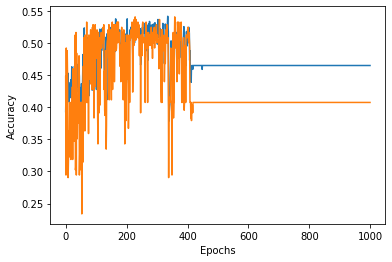

In [220]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [221]:
test_csv =  pd.read_csv(Data_test,sep=";",encoding="utf-8")
display(test_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,1582,278636,2019-08-06,851,842,Club Brugge KV,FK Dynamo Kyiv,1.0,1,0,1,0,-1,-1,-1,-1,8036,4168
1,1583,279611,2019-08-06,7283,1876,FK Crvena Zvezda,FC København,0.0,1,0,1,1,0,2,1,0,100,100
2,1584,278634,2019-08-07,5452,503,FK Krasnodar,FC Porto,2.0,0,0,0,1,-1,-1,-1,-1,5313,6206
3,1585,278632,2019-08-07,1897,654,Medipol Başakşehir FK,PAE Olympiakos SFP,2.0,0,0,0,1,-1,1,-1,0,100,6497
4,1586,278638,2019-08-07,729,2016,FC Basel 1893,LASK Linz,2.0,0,0,1,2,1,-1,0,-1,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1714,285542,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
133,1715,285537,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
134,1716,285545,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
135,1717,285533,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [222]:
X_test= test_csv.drop(['id_match','idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
x_test = X_test[:,1:]
x_test

array([[   -1,    -1,    -1,    -1,  8036,  4168],
       [    0,     2,     1,     0,   100,   100],
       [   -1,    -1,    -1,    -1,  5313,  6206],
       [   -1,     1,    -1,     0,   100,  6497],
       [    1,    -1,     0,    -1,   100,   100],
       [    0,     4,     0,     0,  4858,  5551],
       [    3,     1,     0,     0,   651,  2769],
       [    2,     0,     0,     1,  1054,  3270],
       [    2,     0,     0,     1,  2769,   651],
       [    0,     1,     1,     0,  4168,  8036],
       [    0,     0,     0,     0,   100,   100],
       [    0,     0,     0,     0,  1735,  2478],
       [    0,     0,     0,     0,  8164,  3673],
       [    2,     0,     0,     1,  6497,   100],
       [    1,     0,     0,     1,   100,   100],
       [    0,     0,     0,     0,  5551,  4858],
       [    1,     0,     0,     1,  6206,  5313],
       [    1,    -1,     0,    -1,  4858,  3612],
       [    1,     1,     0,     0,  3270,  8164],
       [    2,     0,     0,   

In [223]:
y_test = test_csv['score'].values
y_test[0]

1.0

In [224]:
test_csv.values

array([[1582, 278636, '2019-08-06', ..., -1, 8036, 4168],
       [1583, 279611, '2019-08-06', ..., 0, 100, 100],
       [1584, 278634, '2019-08-07', ..., -1, 5313, 6206],
       ...,
       [1716, 285545, '2020-03-10', ..., 0, 9221, 6821],
       [1717, 285533, '2020-03-11', ..., 0, 9495, 7276],
       [1718, 285539, '2020-03-11', ..., 0, 14695, 9329]], dtype=object)

In [202]:
predictions = model.predict((x_test, y_test))

In [225]:
print(x_test[58])
print(y_test[58])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[58])
np.argmax(predictions[1])

[   1    0    0    1 9221 6154]
2.0
[2.5698051e-01 4.5455840e-01 2.8834021e-01 2.3792340e-06 1.1854376e-04]


1

# Prédiction Unique

In [226]:
unique = test_csv.values
results = []
equal = []
victory = []
loss = []
i = 0
unique[0][16]

8036

In [227]:
for i in unique:
    puissance_homeTeam = i[16]
    puissance_awayTeam = i[17]
    win_cons_home = i[12]
    win_cons_away = i[13]
    lose_cons_home = i[14]
    lose_cons_away= i[15]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire , perte ,puissance_homeTeam,puissance_awayTeam)

1 25.69805085659027 45.4558402299881 28.83402109146118 8036 4168
1 25.69805085659027 45.4558402299881 28.83402109146118 100 100
1 25.69805085659027 45.4558402299881 28.83402109146118 5313 6206
1 25.69805085659027 45.4558402299881 28.83402109146118 100 6497
1 25.69805085659027 45.4558402299881 28.83402109146118 100 100
1 25.69805085659027 45.4558402299881 28.83402109146118 4858 5551
1 25.69805085659027 45.4558402299881 28.83402109146118 651 2769
1 25.69805085659027 45.4558402299881 28.83402109146118 1054 3270
1 25.69805085659027 45.4558402299881 28.83402109146118 2769 651
1 25.69805085659027 45.4558402299881 28.83402109146118 4168 8036
1 25.69805085659027 45.4558402299881 28.83402109146118 100 100
1 25.69805085659027 45.4558402299881 28.83402109146118 1735 2478
1 25.69805085659027 45.4558402299881 28.83402109146118 8164 3673
1 25.69805085659027 45.4558402299881 28.83402109146118 6497 100
1 25.69805085659027 45.4558402299881 28.83402109146118 100 100
1 25.69805085659027 45.4558402299881 

1 25.69805085659027 45.4558402299881 28.83402109146118 7928 9770
1 25.69805085659027 45.4558402299881 28.83402109146118 6821 9221
1 25.69805085659027 45.4558402299881 28.83402109146118 8832 10885
1 25.69805085659027 45.4558402299881 28.83402109146118 100 13105
1 25.69805085659027 45.4558402299881 28.83402109146118 8949 10390
1 25.69805085659027 45.4558402299881 28.83402109146118 6154 9319
1 25.69805085659027 45.4558402299881 28.83402109146118 9770 7928
1 25.69805085659027 45.4558402299881 28.83402109146118 9221 6821
1 25.69805085659027 45.4558402299881 28.83402109146118 9495 7276
1 25.69805085659027 45.4558402299881 28.83402109146118 14695 9329


In [228]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [229]:
predictions1[0]

array([2.5698051e-01, 4.5455840e-01, 2.8834021e-01, 2.3792340e-06,
       1.1854376e-04], dtype=float32)

In [230]:
result

1

In [232]:
df = {'id_match':test_csv.id_match,'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [233]:
d = pd.DataFrame(df)

In [234]:
d

,id_match,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,278636,2019-08-06,851,842,Club Brugge KV,FK Dynamo Kyiv,25.698051,45.45584,28.834021,1
1,279611,2019-08-06,7283,1876,FK Crvena Zvezda,FC København,25.698051,45.45584,28.834021,1
2,278634,2019-08-07,5452,503,FK Krasnodar,FC Porto,25.698051,45.45584,28.834021,1
3,278632,2019-08-07,1897,654,Medipol Başakşehir FK,PAE Olympiakos SFP,25.698051,45.45584,28.834021,1
4,278638,2019-08-07,729,2016,FC Basel 1893,LASK Linz,25.698051,45.45584,28.834021,1
...,...,...,...,...,...,...,...,...,...,...
132,285542,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,25.698051,45.45584,28.834021,1
133,285537,2020-03-10,95,102,Valencia CF,Atalanta BC,25.698051,45.45584,28.834021,1
134,285545,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,25.698051,45.45584,28.834021,1
135,285533,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,25.698051,45.45584,28.834021,1


In [235]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')